<a href="https://colab.research.google.com/github/syadrn/MSIB-K2-KelasAwanPintar/blob/main/Logika%20dan%20Konsep%20AI/ML_5_SVM_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **REMINDER**
Sebelum memulai pembelajaran self-learning jangan lupa berdoa ya teman-teman dan perhatikan:
1. Jika menggunakan Jupyter Notebook, silahkan pilih "File" --> "Download" --> "Download .ipynb"
2. Jika menggunakan Colab, silahkan pilih "File" --> "Save a copy in drive"

## Klasifikasi Iris Dataset menggunakan SVM

Pada modul kali ini, kita akan melakukan klasifikasi untuk dataset iris dengan menggunakan algoritma Support Vector Machine (SVM). Adapun prediksi didasarkan pada fitur/karakteristik dari bunga Iris, yaitu: Sepal Length, Sepal Width, Petal Length, Petal Width yang sudah memiliki kelas (species). Kelasnya adalah iris-setosa, iris-virginica, iris-versicolor.

# **MODUL SVM**

## 1. Impor Library/Package

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

## 2. Load Dataset

Dataset yang digunakan masih dataset Iris, hanya saja sekarang akan langsung mengakses dari UCI MACHINE LEARNING REPOSITORY.

In [ ]:
#Read the dataset
dataframeasli = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" )

#Data
dataframeasli.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## 3. Data Preprocessing

Dataset ini tidak memiliki nama kolom apapun. Jadi, pertama-tama kita akan mendefinisikan nama kolom dan membaca data yang ada.

In [ ]:
#Mendefinisikan nama kolom data
colnames=["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm", "class"]

#Read the dataset
dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= colnames )

#Data
dataframe.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Terdapat kolom kategorikal pada class, sehingga harus dilakukan encoding untuk mengubahnya menjadi nilai numerik.

In [ ]:
#Encoding the categorical column
dataframe = dataframe.replace({"class":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})
#Visualize the new dataset
dataframe.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Text(0.5, 1.0, 'Correlation On iris Classes')

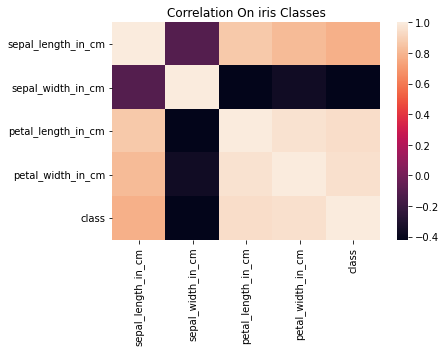

In [ ]:
#Visualisasi dataframe
plt.figure(1)
sns.heatmap(dataframe.corr())
plt.title('Correlation On iris Classes')

## 4. Pemisahan data Training dan Testing

In [ ]:
X = dataframe.iloc[:,:-1] #X = memilih semua fitur kecuali kolom terakhir
y = dataframe.iloc[:, -1].values #y = memilih target yaitu kolom terakhir

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## 5. Modelling Data

In [ ]:
#Membangun model SVM
classifier = SVC(kernel = 'linear', random_state = 0)

#Fit model SVM ke data
classifier.fit(X_train, y_train)

#Membuat prediksi
y_pred = classifier.predict(X_test)

## 6. Evaluasi Model SVM menggunakan metrices Accuracy

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Evaluasi performa model dengan accuracy
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 98.18 %


Diperoleh akurasi sebesar 98 %, dimana kinerja model berarti sangat baik. Serta berdasarkan confusion matrix yang dihasilkan, terlihat hanya ada satu kesalahan klasifikasi data(one misclassified data).

That's it! Teman-teman sudah berhasil melakukan klasifikasi sederhana menggunakan SVM terhadap spesies tumbuhan Iris.